<a href="https://colab.research.google.com/github/Anagha-dsa/Data.science/blob/main/anagha_exit_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exit test: PROBLEM STATEMENT**

* Perform exploratory data analysis (EDA) to summarize the key insights from the dataset, focusing on patterns, trends, and outliers.


* Build a model to predict property prices based on the available features.


* Evaluate the model’s performance using appropriate metrics.


* Based on your findings, write a detailed report explaining the results and provide recommendations for both the real estate company and potential property buyers.

# 1.1 Importing necessary modules

In [199]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1.2  Loading our dataset

In [200]:
# Loading data set
df = pd.read_excel('/content/dataset.xlsx')
# to see all features and observations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


removing unnessary column unnamed: 0

In [201]:
df = df.drop(columns=['Unnamed: 0'])

#**2 EDA**

In [202]:
df.dtypes

,0
Price,float64
Location,object
Bedroom,int64
Bathroom,float64
Carport,float64
Land,float64
Building,float64
Month,float64
City/Regency,object
Latitude,float64


Number of Rows and Columns

In [203]:
df.shape

(32536, 11)

Checking the Statistical measures of our data to check for skewness and distribution

In [204]:
df.describe()

,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
count,3.253600e+04,32536.000000,32521.000000,32521.000000,32533.000000,32527.000000,32527.000000,32526.000000,32527.000000
mean,2.554932e+09,3.524158,2.527721,1.052120,181.392002,179.397485,8.988533,-6.923486,107.625922
std,1.879994e+09,1.235943,1.074318,0.796993,107.491313,108.516303,0.821016,0.051064,0.075701
min,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000,-7.230321,107.434849
25%,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000,-6.952981,107.590747
50%,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000,-6.931934,107.626219
75%,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000,-6.886334,107.659881
max,9.700000e+09,8.000000,7.000000,3.000000,612.000000,585.000000,10.000000,-6.734761,107.886580


## 2.1 checking for null values

In [205]:
df.isnull().sum()

,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9
Latitude,10


there are null values in 'Location',  'Bathroom', 'Carport',
       'Land', 'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'

## 2.2 check for outliers

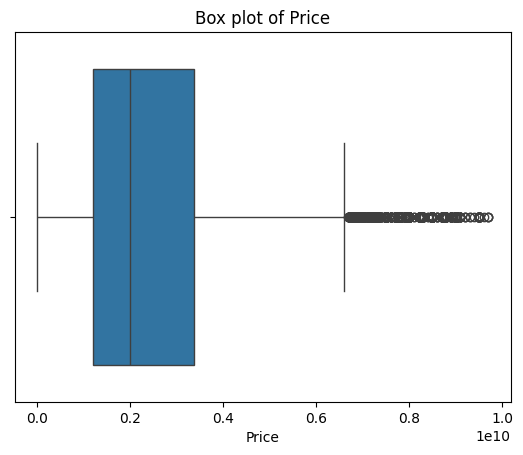

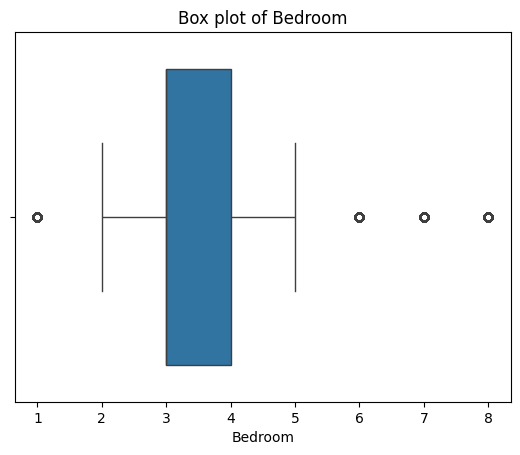

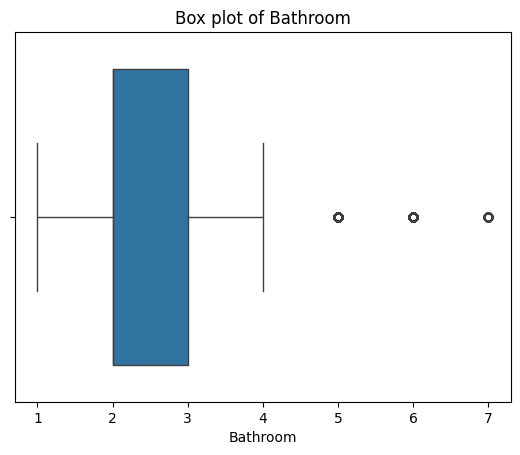

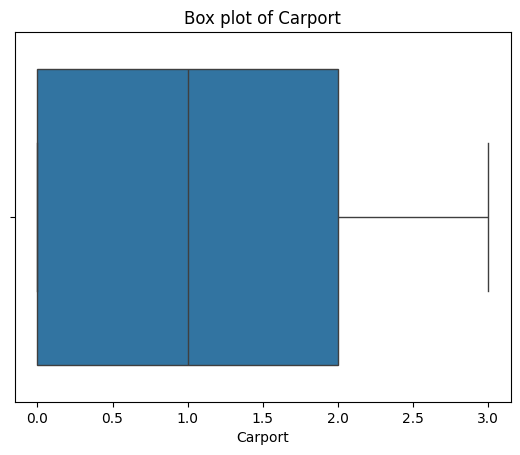

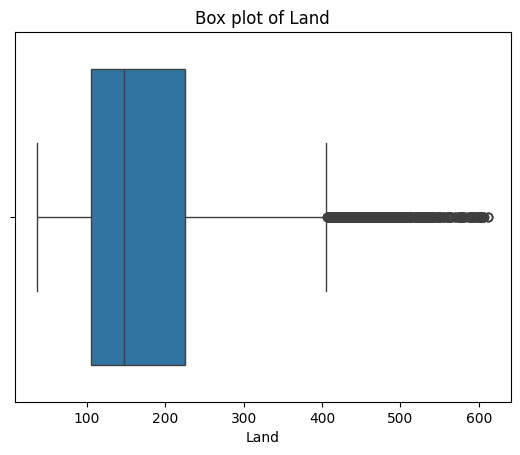

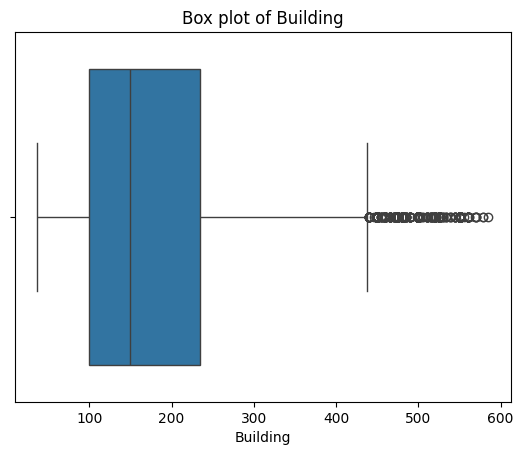

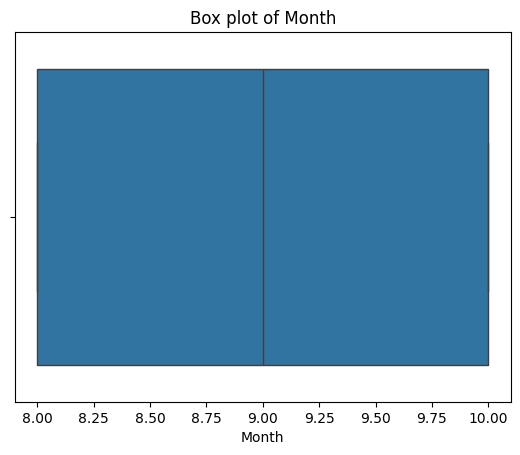

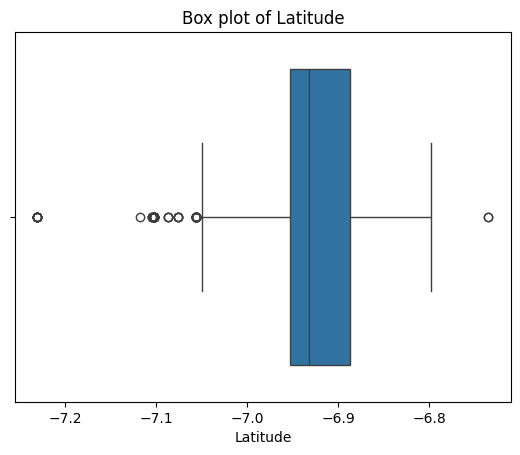

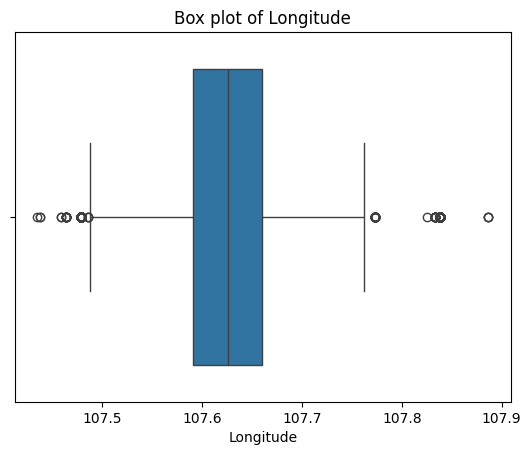

In [206]:
for column in df.select_dtypes(include=np.number):
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

there are outliers in diffderent columns. we need to treat them

#3 Visualization

### univariate

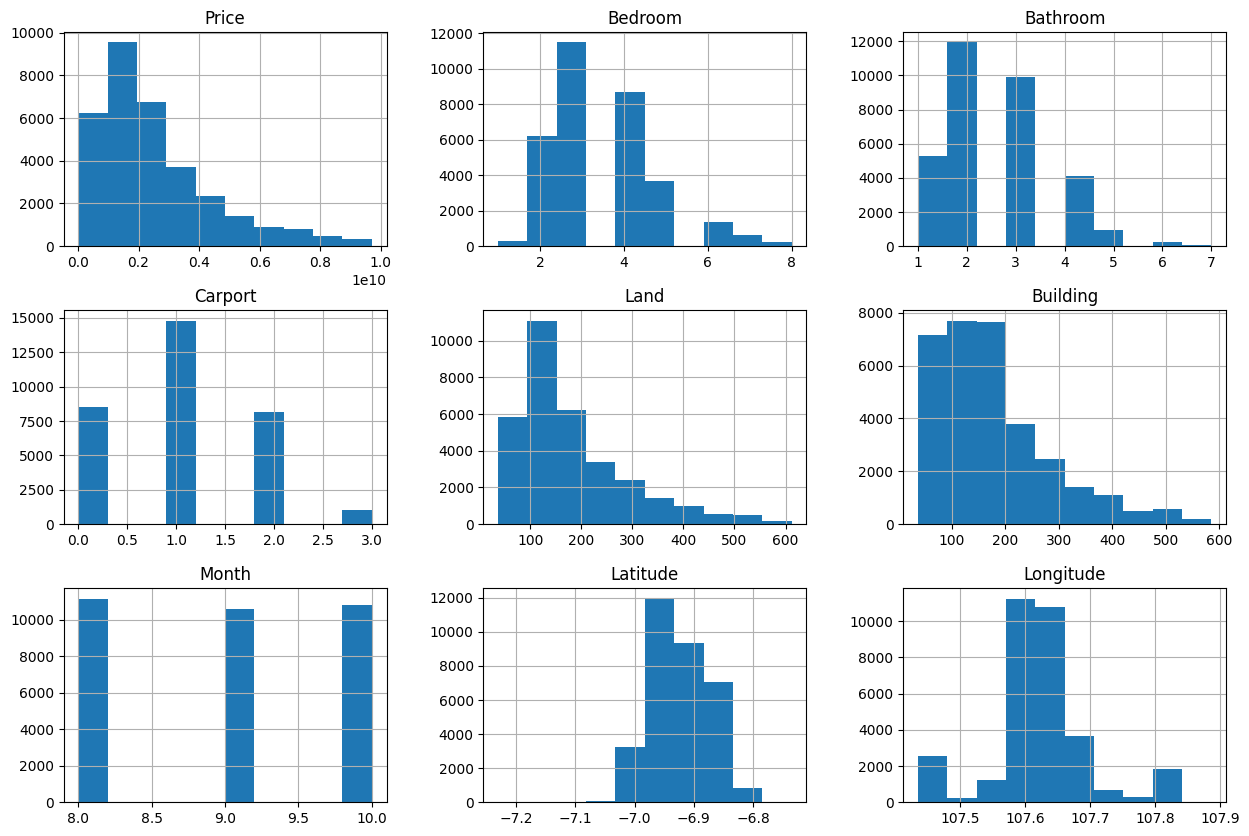

In [207]:
df.hist(figsize=(15, 10))
plt.show()

## Bivariate analysis

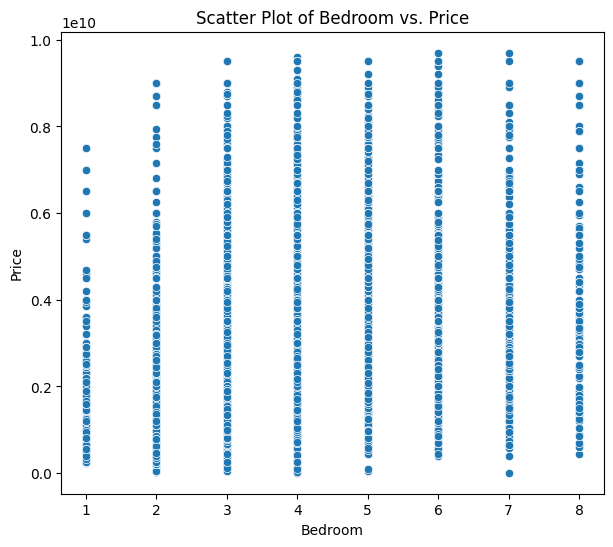

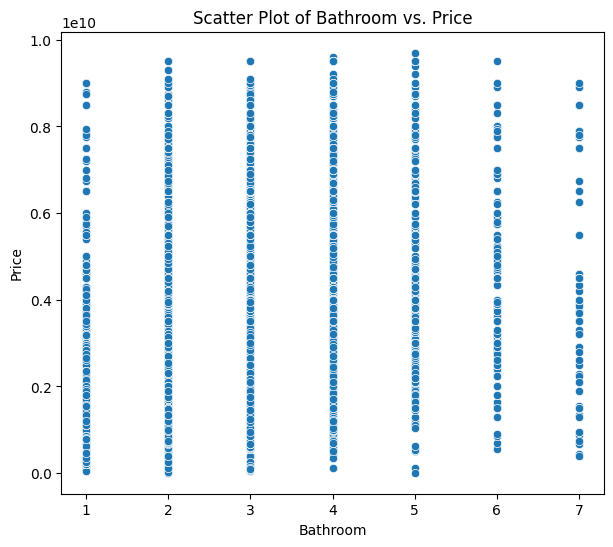

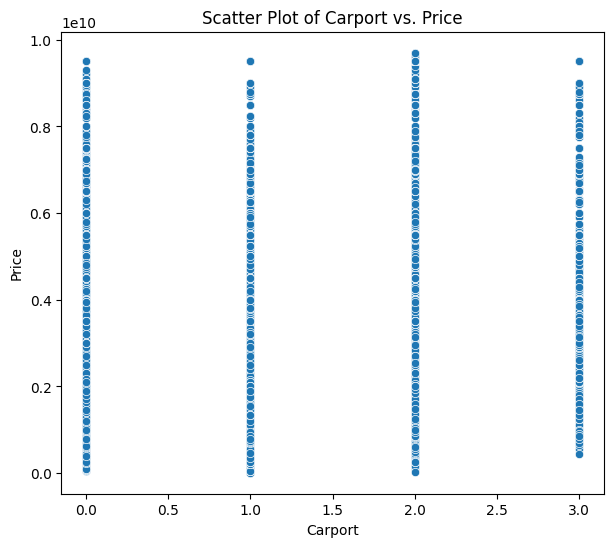

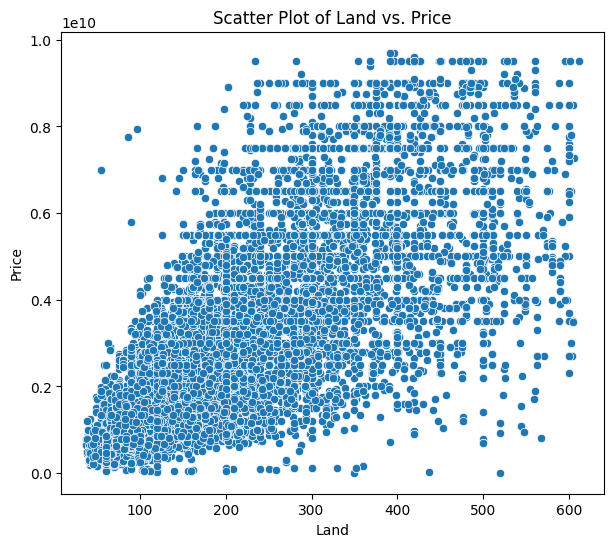

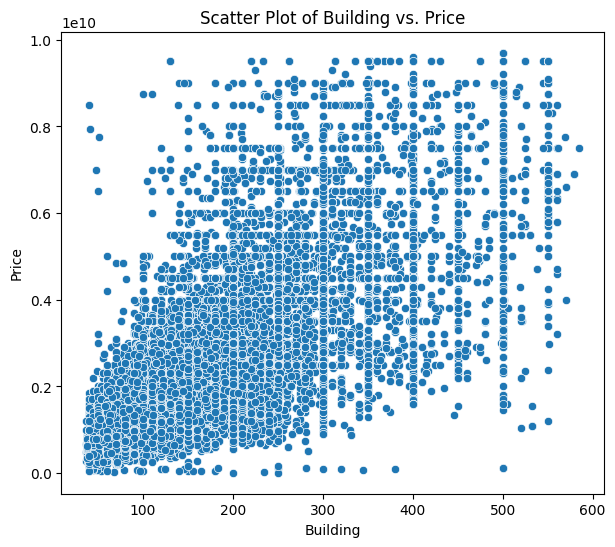

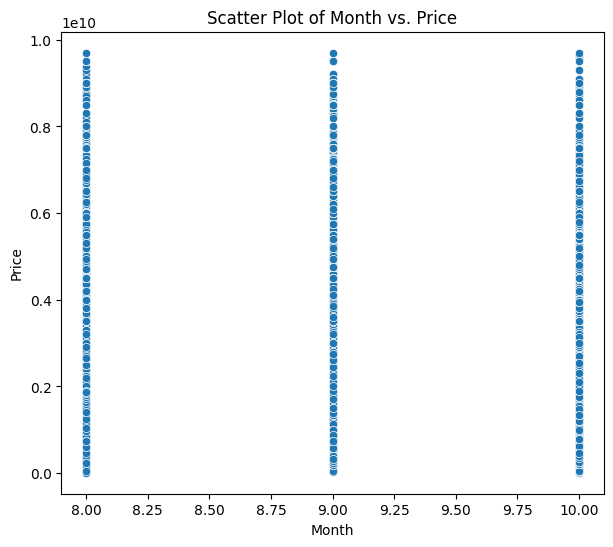

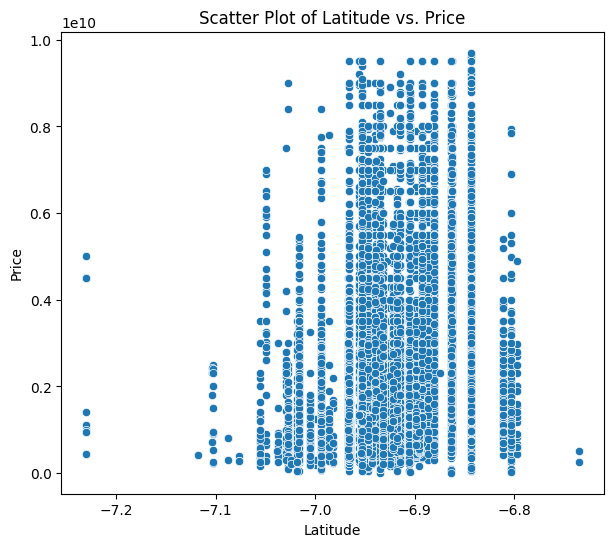

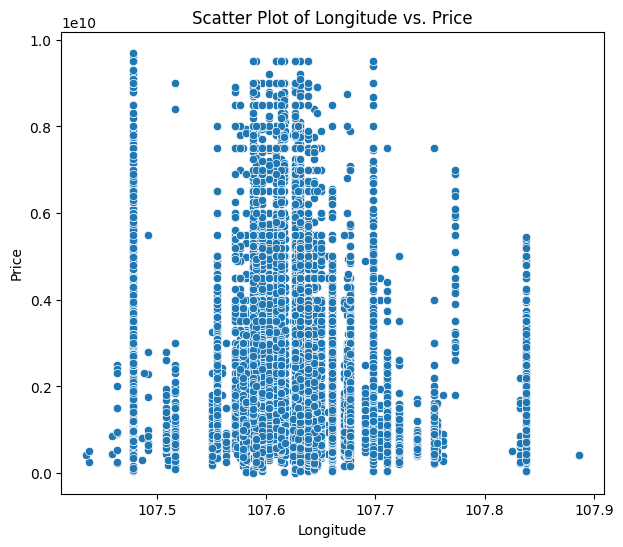

In [208]:
for column in df.select_dtypes(include=np.number):
  if column != 'Price':
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=df[column], y=df['Price'])
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of {column} vs. Price')
    plt.show()

#**4 Null value handling**

In [175]:
for column in df.select_dtypes(include=np.number):
  median_value = df[column].median()
  df[column].fillna(median_value, inplace=True)

for column in df.select_dtypes(include=['object']):
  mode_value = df[column].mode()[0]
  df[column].fillna(mode_value, inplace=True)

numerical columns with missing values are filled using median whereas categorical with mode

In [176]:
df.isna().sum()

,0
Price,0
Location,0
Bedroom,0
Bathroom,0
Carport,0
Land,0
Building,0
Month,0
City/Regency,0
Latitude,0


In [177]:
df.columns

Index(['Price', 'Location', 'Bedroom', 'Bathroom', 'Carport', 'Land',
       'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

#5 outlier treatment- log tranform

In [178]:
# Log transformation for 'Price', 'Bedroom', 'Bathroom', 'Land','Building'
for column in ['Price', 'Bedroom', 'Bathroom', 'Land','Building']:
    df[column + '_log'] = np.log1p(df[column])

print(df[['Price', 'Bedroom', 'Bathroom', 'Land','Building']].head())

          Price  Bedroom  Bathroom   Land  Building
0  1.600000e+09        2       1.0   72.0      50.0
1  8.500000e+08        2       1.0   70.0      80.0
2  8.750000e+08        3       2.0   60.0      70.0
3  1.750000e+09        2       3.0   90.0      94.0
4  4.900000e+09        4       4.0  200.0     300.0


log transformed the respected columns with plus

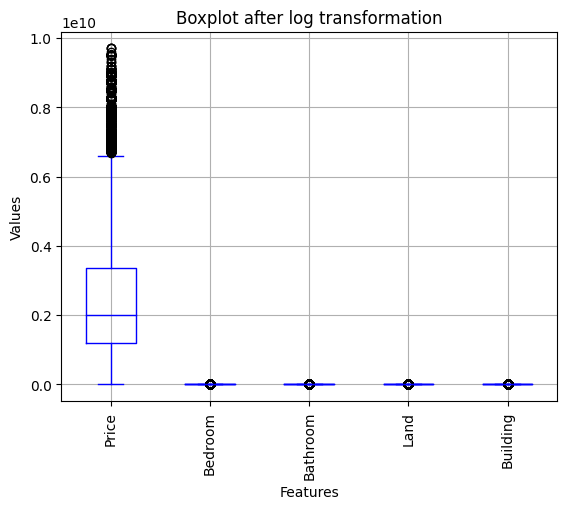

In [179]:
# Outlier checking after log transformation
out_df=df[['Price', 'Bedroom', 'Bathroom', 'Land','Building']]
out_df.boxplot(color='blue')
plt.xticks(rotation=90)
plt.title('Boxplot after log transformation')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [180]:
df.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude,Price_log,Bedroom_log,Bathroom_log,Land_log,Building_log
0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400,21.193269,1.098612,0.693147,4.290459,3.931826
1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804,20.560747,1.098612,0.693147,4.262680,4.394449
2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926,20.589734,1.386294,1.098612,4.110874,4.262680
3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700,21.282882,1.098612,1.386294,4.510860,4.553877
4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271,22.312501,1.609438,1.609438,5.303305,5.707110


In [181]:
df = df.drop(['Price', 'Bedroom', 'Bathroom', 'Land','Building'], axis=1)

df = df.rename(columns={

    'Bedroom_log': 'Bedroom',
    'Bathroom_log': 'Bathroom',
    'Land_log': 'Land',
    'Building_log': 'Building',
    'Price_log': 'Price'
})


Renamed the log-transformed columns to the original names

In [182]:
df.head()

,Location,Carport,Month,City/Regency,Latitude,Longitude,Price,Bedroom,Bathroom,Land,Building
0,Padalarang,1.0,8.0,West Bandung Regency,-6.843600,107.478400,21.193269,1.098612,0.693147,4.290459,3.931826
1,Parongpong,1.0,8.0,West Bandung Regency,-6.803228,107.581804,20.560747,1.098612,0.693147,4.262680,4.394449
2,Buah Batu,1.0,8.0,Bandung City,-6.965549,107.637926,20.589734,1.386294,1.098612,4.110874,4.262680
3,Bojongsoang,1.0,8.0,Bandung Regency,-6.993945,107.643700,21.282882,1.098612,1.386294,4.510860,4.553877
4,Bojongloa Kidul,0.0,8.0,Bandung City,-6.947036,107.596271,22.312501,1.609438,1.609438,5.303305,5.707110


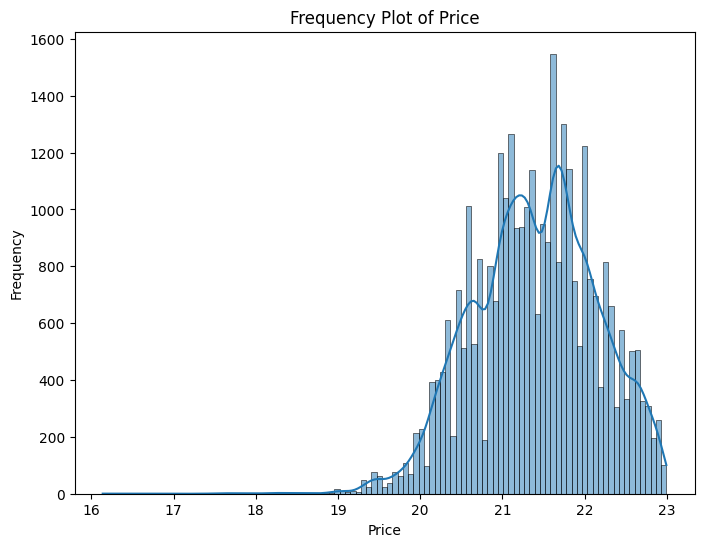

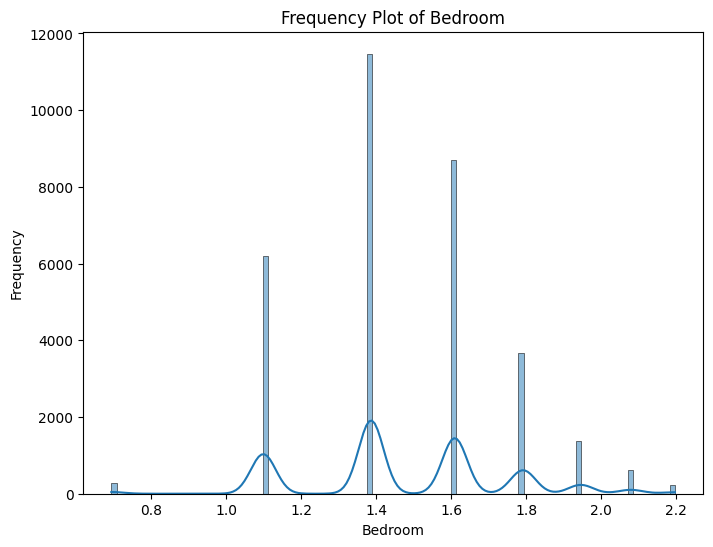

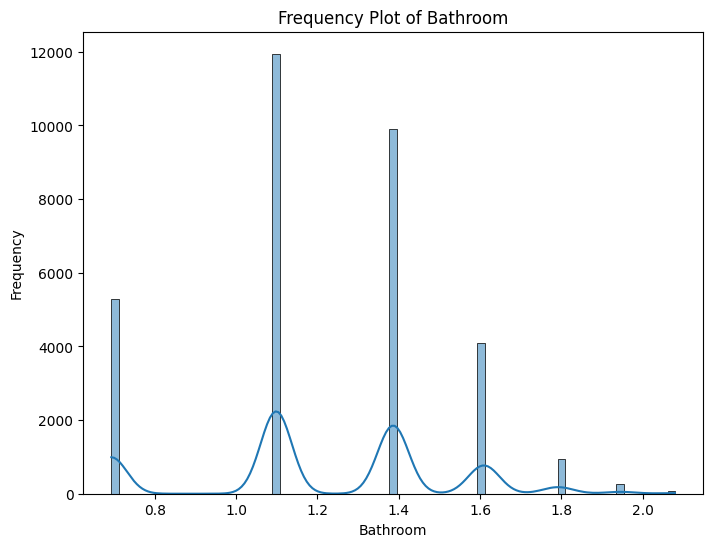

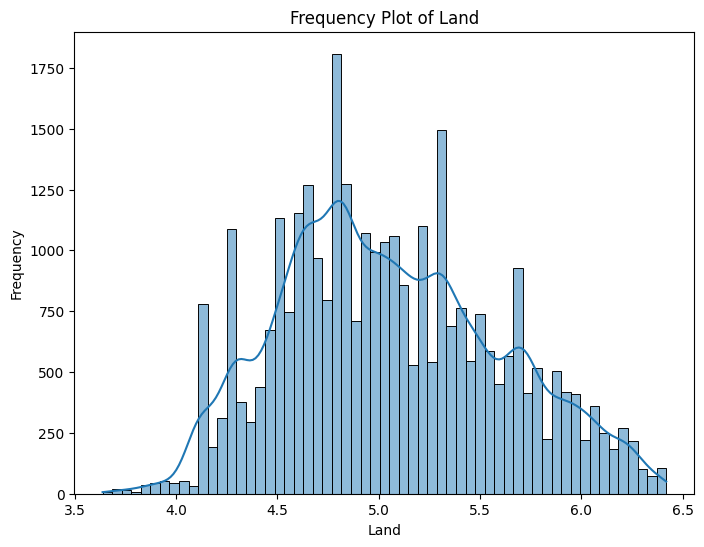

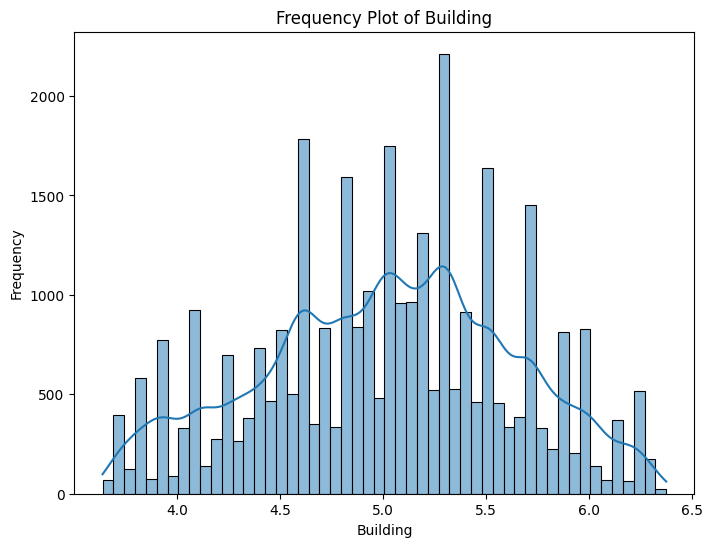

In [183]:
for column in ['Price', 'Bedroom', 'Bathroom', 'Land', 'Building']:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f'Frequency Plot of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

checked the frequency plot of transgformed ones

In [184]:
df.describe()

,Carport,Month,Latitude,Longitude,Price,Bedroom,Bathroom,Land,Building
count,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,1.052096,8.988536,-6.923489,107.625922,21.399572,1.473743,1.214390,5.055729,5.017462
std,0.796810,0.820903,0.051056,0.075690,0.749658,0.266385,0.306437,0.539123,0.609049
min,0.000000,8.000000,-7.230321,107.434849,16.137898,0.693147,0.693147,3.637586,3.637586
25%,0.000000,8.000000,-6.952981,107.590747,20.905587,1.386294,1.098612,4.663439,4.615121
50%,1.000000,9.000000,-6.931934,107.626219,21.416413,1.386294,1.098612,4.997212,5.017280
75%,2.000000,10.000000,-6.886334,107.659881,21.936690,1.609438,1.386294,5.420535,5.463832
max,3.000000,10.000000,-6.734761,107.886580,22.995392,2.197225,2.079442,6.418365,6.373320


# 6 scaling- robust scaler

In [185]:
df.head()

,Location,Carport,Month,City/Regency,Latitude,Longitude,Price,Bedroom,Bathroom,Land,Building
0,Padalarang,1.0,8.0,West Bandung Regency,-6.843600,107.478400,21.193269,1.098612,0.693147,4.290459,3.931826
1,Parongpong,1.0,8.0,West Bandung Regency,-6.803228,107.581804,20.560747,1.098612,0.693147,4.262680,4.394449
2,Buah Batu,1.0,8.0,Bandung City,-6.965549,107.637926,20.589734,1.386294,1.098612,4.110874,4.262680
3,Bojongsoang,1.0,8.0,Bandung Regency,-6.993945,107.643700,21.282882,1.098612,1.386294,4.510860,4.553877
4,Bojongloa Kidul,0.0,8.0,Bandung City,-6.947036,107.596271,22.312501,1.609438,1.609438,5.303305,5.707110


In [186]:
# perform robust scaling on numericals

from sklearn.preprocessing import RobustScaler

numerical_features = ['Bedroom', 'Bathroom', 'Land', 'Building']

scaler = RobustScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())

          Location  Carport  Month          City/Regency  Latitude  \
0       Padalarang      1.0    8.0  West Bandung Regency -6.843600   
1       Parongpong      1.0    8.0  West Bandung Regency -6.803228   
2        Buah Batu      1.0    8.0          Bandung City -6.965549   
3      Bojongsoang      1.0    8.0       Bandung Regency -6.993945   
4  Bojongloa Kidul      0.0    8.0          Bandung City -6.947036   

    Longitude      Price   Bedroom  Bathroom      Land  Building  
0  107.478400  21.193269 -1.289224 -1.409421 -0.933505 -1.278944  
1  107.581804  20.560747 -1.289224 -1.409421 -0.970197 -0.733855  
2  107.637926  20.589734  0.000000  0.000000 -1.170708 -0.889113  
3  107.643700  21.282882 -1.289224  1.000000 -0.642393 -0.546008  
4  107.596271  22.312501  1.000000  1.775660  0.404298  0.812798  


In [187]:
df.describe()

,Carport,Month,Latitude,Longitude,Price,Bedroom,Bathroom,Land,Building
count,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,1.052096,8.988536,-6.923489,107.625922,21.399572,0.391894,0.402451,0.077291,0.000215
std,0.796810,0.820903,0.051056,0.075690,0.749658,1.193783,1.065194,0.712093,0.717617
min,0.000000,8.000000,-7.230321,107.434849,16.137898,-3.106284,-1.409421,-1.795844,-1.625634
25%,0.000000,8.000000,-6.952981,107.590747,20.905587,0.000000,0.000000,-0.440860,-0.473847
50%,1.000000,9.000000,-6.931934,107.626219,21.416413,0.000000,0.000000,0.000000,0.000000
75%,2.000000,10.000000,-6.886334,107.659881,21.936690,1.000000,1.000000,0.559140,0.526153
max,3.000000,10.000000,-6.734761,107.886580,22.995392,3.634119,3.409421,1.877110,1.597764


# 7 Encoding- frequecy encoder

In [188]:
for column in df.select_dtypes(include=['object']):
  # Calculate the frequency of each unique value in the column
  frequency_map = df[column].value_counts(normalize=True).to_dict()

  # Replace the categorical values with their frequencies
  df[column + '_freq_encoded'] = df[column].map(frequency_map)

In [189]:
df.head()

,Location,Carport,Month,City/Regency,Latitude,Longitude,Price,Bedroom,Bathroom,Land,Building,Location_freq_encoded,City/Regency_freq_encoded
0,Padalarang,1.0,8.0,West Bandung Regency,-6.843600,107.478400,21.193269,-1.289224,-1.409421,-0.933505,-1.278944,0.078682,0.105975
1,Parongpong,1.0,8.0,West Bandung Regency,-6.803228,107.581804,20.560747,-1.289224,-1.409421,-0.970197,-0.733855,0.018042,0.105975
2,Buah Batu,1.0,8.0,Bandung City,-6.965549,107.637926,20.589734,0.000000,0.000000,-1.170708,-0.889113,0.085751,0.737890
3,Bojongsoang,1.0,8.0,Bandung Regency,-6.993945,107.643700,21.282882,-1.289224,1.000000,-0.642393,-0.546008,0.025879,0.156135
4,Bojongloa Kidul,0.0,8.0,Bandung City,-6.947036,107.596271,22.312501,1.000000,1.775660,0.404298,0.812798,0.045211,0.737890


In [190]:

df = df.drop(['Location', 'City/Regency'], axis=1)

# Rename the freq encoded columns to the original names
df = df.rename(columns={
     'Location_freq_encoded': 'Location',
     'City/Regency_freq_encoded': 'City/Regency'

})

In [191]:
df.head()

,Carport,Month,Latitude,Longitude,Price,Bedroom,Bathroom,Land,Building,Location,City/Regency
0,1.0,8.0,-6.843600,107.478400,21.193269,-1.289224,-1.409421,-0.933505,-1.278944,0.078682,0.105975
1,1.0,8.0,-6.803228,107.581804,20.560747,-1.289224,-1.409421,-0.970197,-0.733855,0.018042,0.105975
2,1.0,8.0,-6.965549,107.637926,20.589734,0.000000,0.000000,-1.170708,-0.889113,0.085751,0.737890
3,1.0,8.0,-6.993945,107.643700,21.282882,-1.289224,1.000000,-0.642393,-0.546008,0.025879,0.156135
4,0.0,8.0,-6.947036,107.596271,22.312501,1.000000,1.775660,0.404298,0.812798,0.045211,0.737890


# 8 correlation

In [192]:
correlation_matrix = df.corr()
print(correlation_matrix)


               Carport     Month  Latitude  Longitude     Price   Bedroom  \
Carport       1.000000 -0.002658  0.067487  -0.049433  0.255648  0.185283   
Month        -0.002658  1.000000  0.020073  -0.011050  0.023993  0.013034   
Latitude      0.067487  0.020073  1.000000  -0.590901  0.279365  0.089240   
Longitude    -0.049433 -0.011050 -0.590901   1.000000 -0.260768 -0.100551   
Price         0.255648  0.023993  0.279365  -0.260768  1.000000  0.514932   
Bedroom       0.185283  0.013034  0.089240  -0.100551  0.514932  1.000000   
Bathroom      0.224191  0.018302  0.142381  -0.113153  0.605437  0.678877   
Land          0.257393  0.017787  0.203127  -0.183045  0.783181  0.530194   
Building      0.253651  0.016363  0.162279  -0.158415  0.780937  0.662993   
Location      0.017661  0.030957  0.036799  -0.142458  0.167478  0.074659   
City/Regency  0.119034 -0.001659  0.005109   0.059682  0.158297  0.177391   

              Bathroom      Land  Building  Location  City/Regency  
Carpor

# corelation heatmap

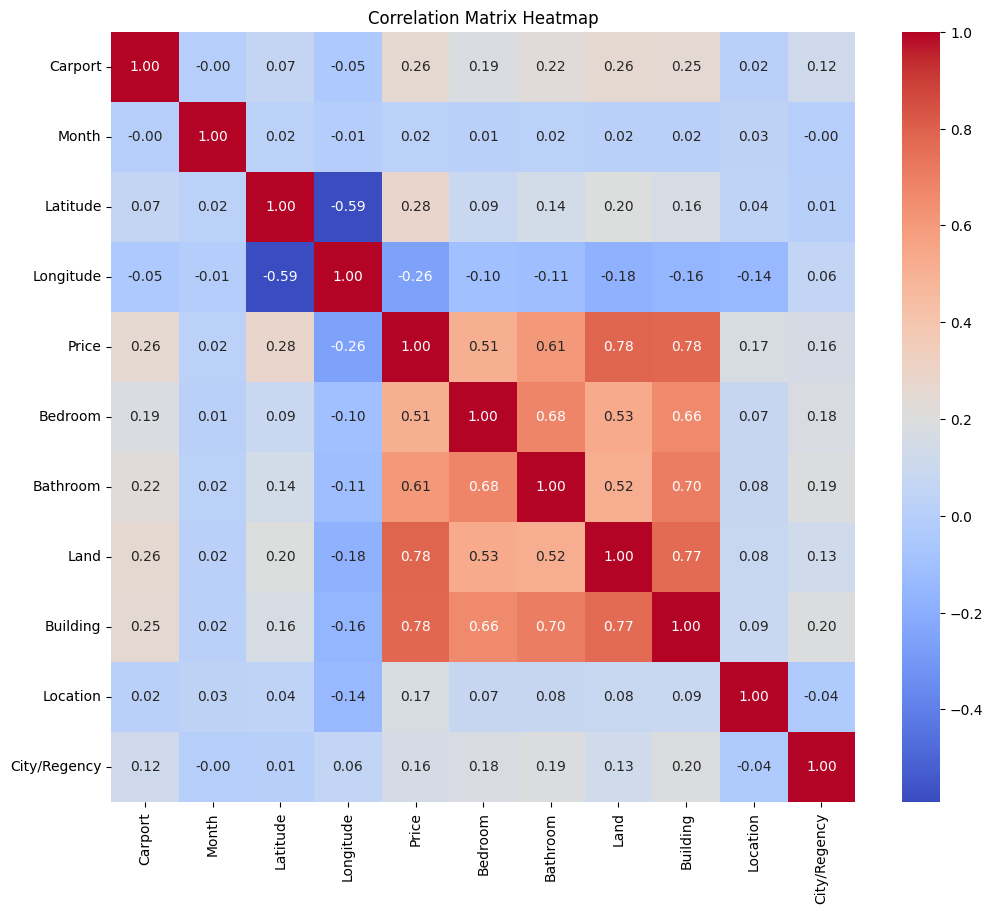

In [193]:
# corelation heatmap

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [194]:
df.columns

Index(['Carport', 'Month', 'Latitude', 'Longitude', 'Price', 'Bedroom',
       'Bathroom', 'Land', 'Building', 'Location', 'City/Regency'],
      dtype='object')

**high corelation:**

price with land: 0.78

price with building:0.78

land with building: 0.77, leading to multi collinearity


**moderate corelation:**

price with bedroom:0.51

price with bathroom: 0.61

bedroom with bathroom: 0.68

**key drivers for propert prices are land, building , bedroom, bathroom**

#10 feature selection

In [195]:
df.columns

Index(['Carport', 'Month', 'Latitude', 'Longitude', 'Price', 'Bedroom',
       'Bathroom', 'Land', 'Building', 'Location', 'City/Regency'],
      dtype='object')

In [196]:
df1=df.copy()

In [197]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#11 Model selection

In [198]:
#  prediction on different models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Initialize models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
knn_model = KNeighborsRegressor()
xgb_model = XGBRegressor()

# Fit models on training data
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_linear = linear_reg.predict(X_test)
y_pred_tree = decision_tree_reg.predict(X_test)
y_pred_forest = random_forest_reg.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  print(f"{model_name}:")
  print(f"Mean Squared Error (MSE): {mse}")
  print(f"R-squared (R2): {r2}")
  print(f"Mean Absolute Error (MAE): {mae}")
  print("------------------------")

evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree Regression")
evaluate_model(y_test, y_pred_forest, "Random Forest Regression")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Linear Regression:
Mean Squared Error (MSE): 0.1514949987954397
R-squared (R2): 0.7242403650235378
Mean Absolute Error (MAE): 0.2962018550145374
------------------------
Decision Tree Regression:
Mean Squared Error (MSE): 0.13067503464506872
R-squared (R2): 0.7621380234279693
Mean Absolute Error (MAE): 0.18465252997917994
------------------------
Random Forest Regression:
Mean Squared Error (MSE): 0.07339339257563658
R-squared (R2): 0.8664052588714832
Mean Absolute Error (MAE): 0.1593853855627528
------------------------
K-Nearest Neighbors:
Mean Squared Error (MSE): 0.1614842024745304
R-squared (R2): 0.706057460094966
Mean Absolute Error (MAE): 0.3001231634358055
------------------------
XGBoost:
Mean Squared Error (MSE): 0.0873464059665097
R-squared (R2): 0.8410072067240041
Mean Absolute Error (MAE): 0.2030479748537431
------------------------


## **model Evaluation:**

**Random Forest Regression is the best model** among the five, offering the lowest error and highest explained variance.

Linear Regression and K-Nearest Neighbors perform poorly, while Decision Tree Regression and XGBoost show improvement but are outperformed by Random Forest.

## **Recommendations for real estate companies:**

* company should give importance to properties with more bedrooms, bathrooms, land area, and building size to attract potential buyers.

* as lattitude and longitude are less corelated with property, we need to do more investigation on them and find reasons behind them






## **Recommendations for Potential Property Buyers:**

* When considering a property, prioritize features such as bedrooms, bathrooms, land area, and building size as they have a significant impact on price.

* Consider the location of the property and research any factors that might influence prices like schools, offices



In [210]:
price_by_city = df.groupby('City/Regency')['Price'].mean()

if 'West Bandung Regency' in price_by_city and 'Bandung City' in price_by_city:
    west_bandung_price = price_by_city['West Bandung Regency']
    bandung_city_price = price_by_city['Bandung City']

    print(f"Average Property Price in West Bandung Regency: {west_bandung_price}")
    print(f"Average Property Price in Bandung City: {bandung_city_price}")

    if west_bandung_price > bandung_city_price:
        print("West Bandung Regency has higher average property prices.")
    elif west_bandung_price < bandung_city_price:
        print("Bandung City has higher average property prices.")
    else:
        print("Average property prices are similar in both regions.")


Average Property Price in West Bandung Regency: 3187006235.49884
Average Property Price in Bandung City: 2703378169.9237466
West Bandung Regency has higher average property prices.


**According to location analysis, Properties of West Bandung Regency has higher average price than Bandung City**

**key drivers for propert prices are land, building , bedroom, bathroom**